In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.ndimage import gaussian_filter1d

In [29]:
# Windows Clark WS Path
#spike_times = "Z:/Wu_sleep/m1/SD1/20240914_SD1_test_1200_g0/catgt_20240914_SD1_test_1200_g0/20240914_SD1_test_1200_g0_imec0/imec0_ks25/spike_times.npy"
#spike_clusters = "Z:/Wu_sleep/m1/SD1/20240914_SD1_test_1200_g0/catgt_20240914_SD1_test_1200_g0/20240914_SD1_test_1200_g0_imec0/imec0_ks25/spike_clusters.npy"

# mac macAir Path
file_dir = "/Users/alexandracheng/Desktop/Harris_Lab/Collab/Wu_Sleep/Wu_Sleep_Data/"
spike_times_file = "/Users/alexandracheng/Desktop/Harris_Lab/Collab/Wu_Sleep/Wu_Sleep_Data/spike_times_m1_1000.npy"
spike_clusters_file = "/Users/alexandracheng/Desktop/Harris_Lab/Collab/Wu_Sleep/Wu_Sleep_Data/spike_clusters_m1_1000.npy"

# parameters
bin_size = 15000

sample_rate = 30000
sigma = 6

In [31]:
spike_clusters = np.load(spike_clusters_file)
ids, counts = np.unique(spike_clusters, return_counts = True)
counts_array = np.zeros(ids.max() +1, dtype=int)

print(len(ids))
print(ids.max())

439
460


In [12]:
def firing_rate(spike_times_file, spike_clusters_file, bin_size, cluster):
    spike_times = np.load(spike_times_file)
    spike_clusters = np.load(spike_clusters_file)

    if cluster == "all":
        clust_ind = np.unique(spike_clusters)
    else:
        clust_ind = cluster
    t_end = np.max(spike_times)
    t_bins = np.arange(0,t_end,bin_size)
    
    clust_num = len(clust_ind)
    fr = np.zeros((len(clust_ind), len(t_bins)-1))
    for i in range(len(clust_ind)):
        spikes_t_ind = spike_times[np.where(spike_clusters == clust_ind[i])[0]]
        spikes_count, edges = np.histogram(spikes_t_ind, t_bins)

        fr[i,:] = spikes_count

    return fr, t_bins[:-1], clust_num

In [13]:
def firing_rate_smooth(fr, sigma):
    fr_smooth = np.zeros(fr.shape)
    for i in range(len(fr_smooth)):
        fr_smooth[i,:] = gaussian_filter1d(fr[i,:], sigma)

    return fr_smooth

In [7]:
fr, t_bins, clust_num = firing_rate(spike_times_file, spike_clusters_file, bin_size, "all")
fr_smooth = firing_rate_smooth(fr, sigma)

In [ ]:
fr.shape

(609, 1218)

In [18]:
t_stamp = np.arange(900, 2200, 100)
#file_name = "spike_times"+"_m1_"+str(t_stamp[0])+".npy"

mean_fr_sessions = []

for s in range(len(t_stamp)):
    spike_times_file = file_dir + "spike_times"+"_m1_"+str(t_stamp[s])+".npy"
    spike_clusters_file = file_dir + "spike_clusters"+"_m1_"+str(t_stamp[s])+".npy"

    fr, t_bins, clust_num = firing_rate(spike_times_file, spike_clusters_file, bin_size, "all")
    fr_smooth = firing_rate_smooth(fr, sigma)
    fr_smooth_avg = np.average(fr_smooth, axis=1)

    mean_fr_sessions.append(fr_smooth_avg)

In [19]:
len(mean_fr_sessions)

13

In [42]:
spike_times_files = file_dir + "spike_times"+"_m1_"+str(t_stamp[2])+".npy"
spike_clusters_file = file_dir + "spike_clusters"+"_m1_"+str(t_stamp[2])+".npy"

fr, t_bins, clust_num = firing_rate(spike_times_file, spike_clusters_file, bin_size, "all")
fr_smooth = firing_rate_smooth(fr, sigma)
fr_smooth_avg = np.average(fr_smooth, axis=1)

mean_fr_sessions[i,0] = clust_num
mean_fr_sessions[i,1:clust_num+1] = fr_smooth_avg

In [ ]:
X = (t_bins/sample_rate).reshape(-1,1)
y = fr[241,:]

gpr = GaussianProcessRegressor().fit(X, y)
mean_prediction, std_prediction = gpr.predict(X, return_std=True)


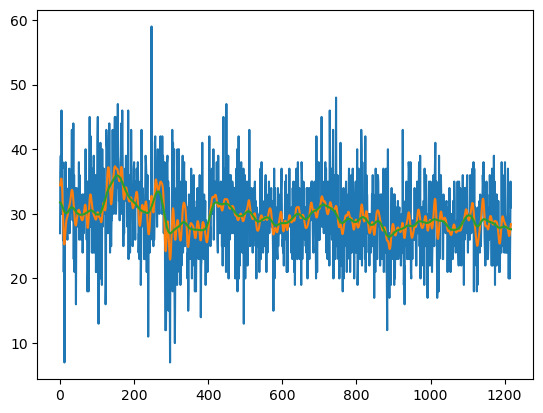

In [ ]:
X = (t_bins/sample_rate).reshape(-1,1)
y = fr[241,:]


y3 = gaussian_filter1d(y, 3)
y6 = gaussian_filter1d(y, 10)

plt.plot(y[0:3000])
plt.plot(y3[0:3000])
plt.plot(y6[0:3000])

In [ ]:
plt.plot(X[0:3000],y[0:3000])
plt.plot(X[0:3000],mean_prediction[0:3000])